<a href="https://colab.research.google.com/github/silverstone122004-create/SIMULATION-ACTIVITY/blob/main/Aves-%20Chap%208.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **GENETIC ALGORITHM **

In [91]:
import numpy as np

var_values = [1,-3,4.5,2]
num_coeff = 4
pop_chrom = 10
sel_rate = 5

pop_size = (pop_chrom,num_coeff)
pop_new = np.random.uniform(low=-10.0, high=10.0, size=pop_size)
print(pop_new)

num_gen = 100
for k in range(num_gen):
    fitness = np.sum(pop_new *var_values, axis=1)
    par_sel = np.empty((sel_rate, pop_new.shape[1]))
    print("Current generation = ", k)
    print("Best fitness value : ", np.max(fitness))

    for i in range(sel_rate):
        sel_id = np.where(fitness == np.max(fitness))
        sel_id = sel_id[0][0]
        par_sel[i, :] = pop_new[sel_id, :]
        fitness[sel_id]=np.min(fitness)

    offspring_size=(pop_chrom-sel_rate, num_coeff)
    offspring = np.empty(offspring_size)
    crossover_lenght = int(offspring_size[1]/2)

    for j in range(offspring_size[0]):
        par1_id = np.random.randint(0,par_sel.shape[0])
        par2_id = np.random.randint(0,par_sel.shape[0])
        offspring[j, 0:crossover_lenght] = par_sel[par1_id, 0:crossover_lenght]
        offspring[j, crossover_lenght:] = par_sel[par2_id, crossover_lenght:]


    for m in range(offspring.shape[0]):
        mut_val = np.random.uniform(-1.0, 1.0)
        mut_id = np.random.randint(0,par_sel.shape[1])
        offspring[m, mut_id] = offspring[m, mut_id] + mut_val

    pop_new[0:par_sel.shape[0], :] = par_sel
    pop_new[par_sel.shape[0]:, :] = offspring


fitness = np.sum(pop_new *var_values, axis=1)
best_id = np.where(fitness == np.max(fitness))
print("Optimized coefficient values = ", pop_new[best_id, :])
print("Maximum value of y = ", fitness[best_id])

[[ 5.8551558  -5.7058945  -6.63520553  3.76005896]
 [ 1.57462207 -1.33410696  9.07932404 -3.70670485]
 [ 0.64366454  9.13895575  6.0372909  -1.0183912 ]
 [ 1.44318664 -1.91792411  0.72455003  5.71291968]
 [ 5.18935771 -5.62288376  7.55908621  3.94097527]
 [-6.35505283 -4.45108494  8.46079301  6.30084896]
 [ 1.48376202 -0.18573639 -6.39649005  8.56042943]
 [-9.26223248  5.25089227 -8.67156423 -6.55636409]
 [ 3.84510931  3.50802497 -3.40178832  5.49681218]
 [-0.89146647  8.68306465 -7.40200653 -4.25135465]]
Current generation =  0
Best fitness value :  63.95584747395983
Current generation =  1
Best fitness value :  64.39062081211739
Current generation =  2
Best fitness value :  66.17227495380948
Current generation =  3
Best fitness value :  73.8154469111923
Current generation =  4
Best fitness value :  74.01980154780645
Current generation =  5
Best fitness value :  75.2339951507286
Current generation =  6
Best fitness value :  77.17791513345296
Current generation =  7
Best fitness value 

# **SYMBOLIC REGRESSION **

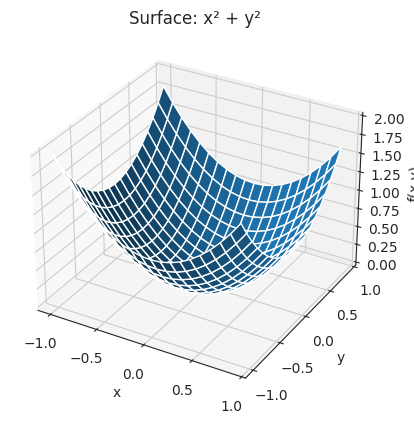

/usr/local/lib/python3.12/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    36.62          1.17183        7         0.250126         0.227431      9.08s
   1     9.93         0.635291       11        0.0582016        0.0575821      6.33s
   2     6.94         0.462143        7                0                0      5.11s
Learned Program:
add(mul(X1, X1), mul(X0, X0))
R2 Score: 1.0


In [92]:


import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from gplearn.genetic import SymbolicRegressor


x = np.arange(-1, 1, 1/10)
y = np.arange(-1, 1, 1/10)
x, y = np.meshgrid(x, y)
f_values = x**2 + y**2

# ----- Plot the surface -----
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, f_values)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x,y)')
plt.title("Surface: x² + y²")
plt.show()

# ----- Training data -----
input_train = np.random.uniform(-1, 1, 200).reshape(100, 2)
output_train = input_train[:, 0]**2 + input_train[:, 1]**2

# ----- Test data -----
input_test = np.random.uniform(-1, 1, 200).reshape(100, 2)
output_test = input_test[:, 0]**2 + input_test[:, 1]**2

# ----- Function set -----
function_set = ['add', 'sub', 'mul']

# ----- Symbolic Regression Model -----
sr_model = SymbolicRegressor(
    population_size=1000,
    function_set=function_set,
    generations=10,
    stopping_criteria=0.001,
    p_crossover=0.7,
    p_subtree_mutation=0.1,
    p_hoist_mutation=0.05,
    p_point_mutation=0.1,
    max_samples=0.9,
    verbose=1,
    parsimony_coefficient=0.01,
    random_state=1
)

# ----- Train the model -----
sr_model.fit(input_train, output_train)

# ----- Output the learned formula -----
print("Learned Program:")
print(sr_model._program)

# ----- R2 Score -----
print("R2 Score:", sr_model.score(input_test, output_test))

# **CELLULAR AUTOMATA**

Binary rule is: [0 1 1 1 1 1 1 0]


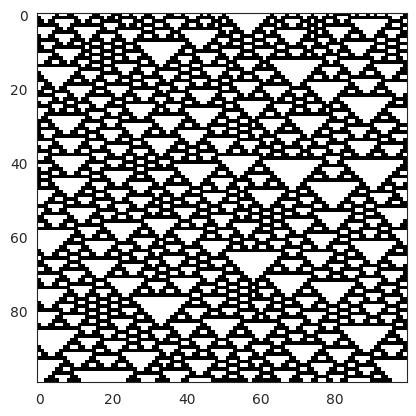

In [93]:
import numpy as np
import matplotlib.pyplot as plt

cols_num=100
rows_num=100
wolfram_rule=126
bin_rule = np.array([int(_) for _ in np.binary_repr(wolfram_rule, 8)])
print('Binary rule is:',bin_rule)

cell_state = np.zeros((rows_num, cols_num),dtype=np.int8)
cell_state[0, :] = np.random.randint(0,2,cols_num)

update_window= np.array([[4], [2], [1]])
for j in range(rows_num - 1):
    update = np.vstack((np.roll(cell_state[j, :], 1), cell_state[j, :],
                   np.roll(cell_state[j, :], -1))).astype(np.int8)
    rule_up = np.sum(update * update_window, axis=0).astype(np.int8)
    cell_state[j + 1, :] = bin_rule[7 - rule_up]


ca_img= plt.imshow(cell_state,cmap=plt.cm.binary)
plt.show()